<a href="https://colab.research.google.com/github/mmostafahareb/ESS_Project/blob/main/ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best hyperparameters:  {'alpha': 1}
Best score:  7.010986702753861e-07
Mean squared error on test set:  5.61465748160752e-07


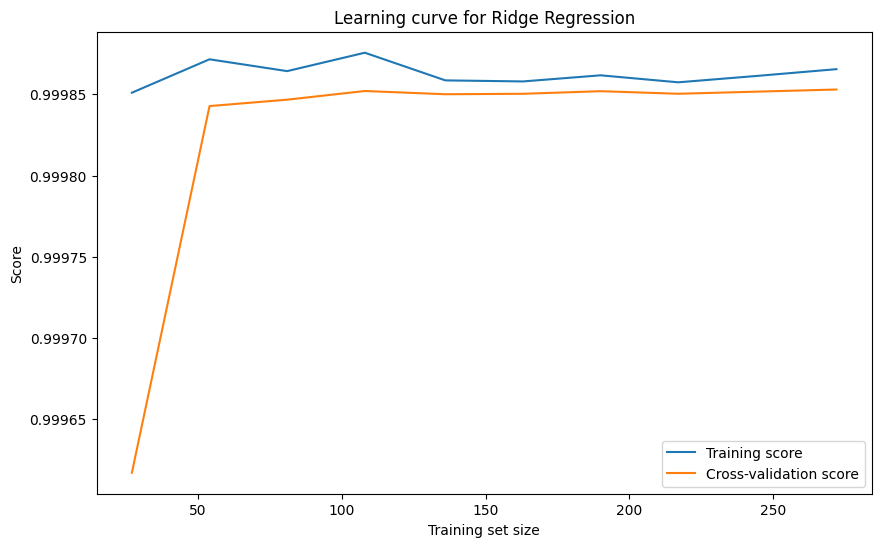

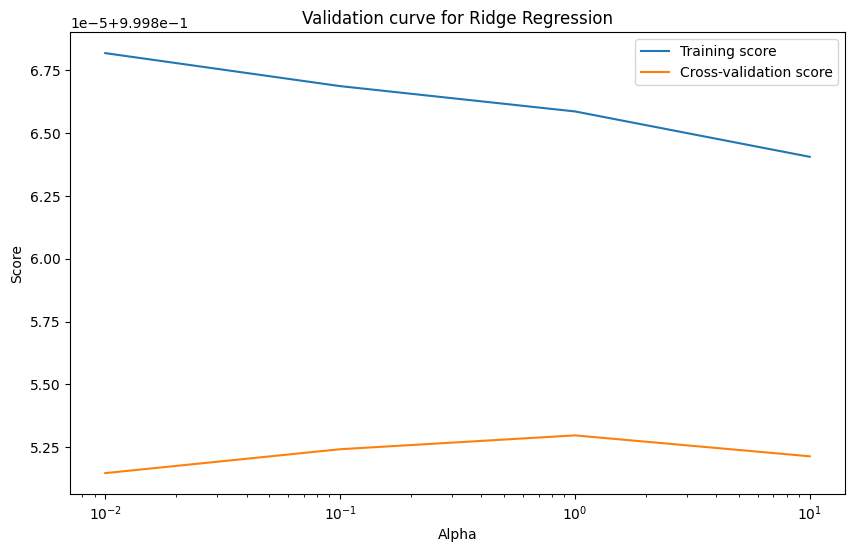

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('soh_lithium_ion.csv')

# Split the data into features (X) and target (y)
X = df.drop('SOH_discharge_capacity', axis=1)
y = df['SOH_discharge_capacity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the K-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model to use for the GridSearchCV
model = Ridge(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# Define the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Calculate the mean squared error of the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error on test set: ", mse)

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=kf)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.title('Learning curve for Ridge Regression')
plt.show()

# Plot validation curve
param_range = [0.01, 0.1, 1, 10]
train_scores, test_scores = validation_curve(best_model, X_train, y_train, param_name='alpha', param_range=param_range, cv=kf)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, label='Training score')
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.xscale('log')
plt.legend(loc='best')
plt.title('Validation curve for Ridge Regression')
plt.show()
